<a href="https://colab.research.google.com/github/20-hayato/machine_learning_test/blob/main/lesson2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,X,Y,Z
0,-0.141576,6.694634,7.287461
1,2.068338,-0.260441,2.068179
2,1.367249,-1.541038,2.530409
3,1.391147,4.226174,2.719843
4,1.249654,4.269417,1.901846
...,...,...,...
145,-1.168113,7.815050,9.383296
146,0.229615,3.914797,1.240445
147,-1.411635,6.103420,8.727998
148,0.766549,4.797289,0.963595


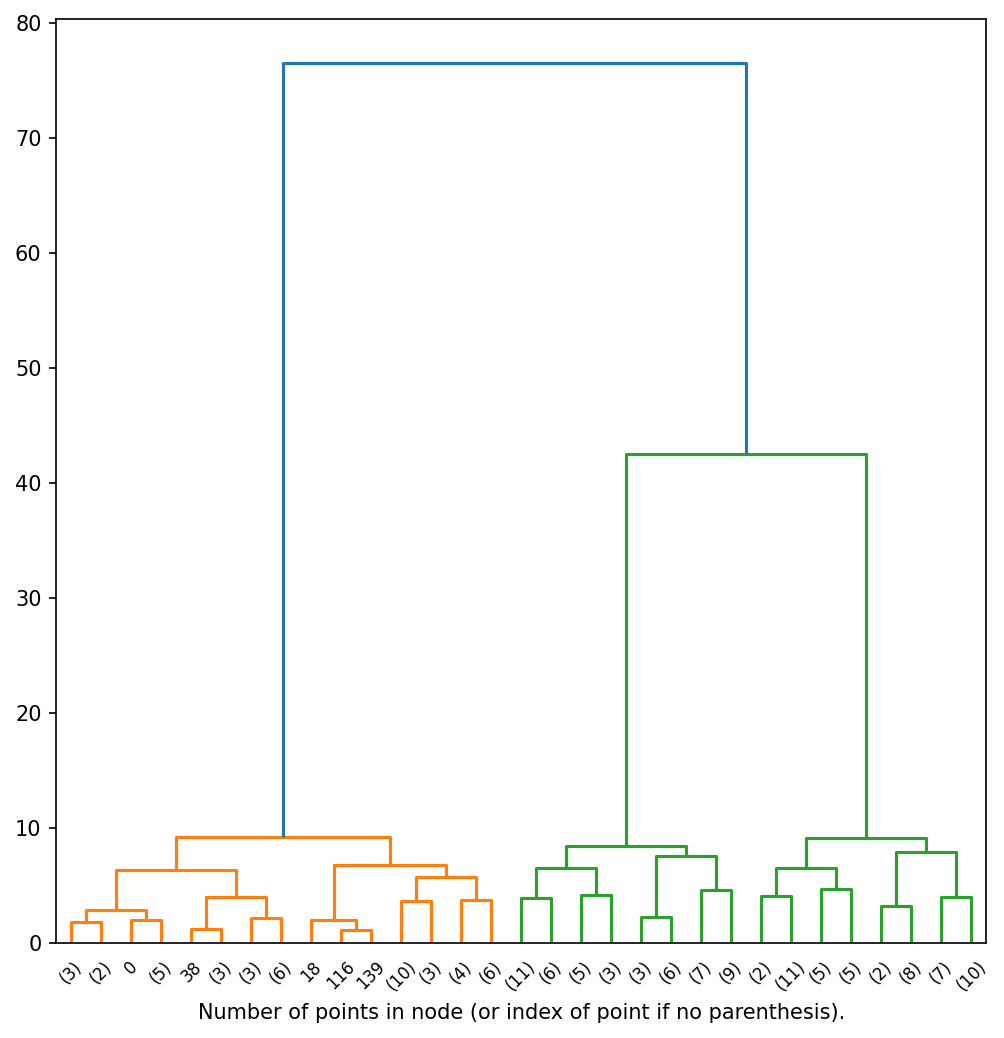

In [1]:
#階層型クラスタリング
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
#from sklearn.cluster.hierarchical import plot_dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


def plot_dendrogram(model, **kwargs):

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

    return linkage_matrix


df = pd.read_csv("lesson2-exercise-data1.csv")
display(df)
model = AgglomerativeClustering(metric='euclidean', linkage='ward',distance_threshold=0, n_clusters=None)

model = model.fit(df)
fig = plt.figure(figsize=(8,8),dpi=150)
linkage_matrix = plot_dendrogram(model, truncate_mode='level', p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()





2 0.6096793037904706
3 0.6432613495984842
4 0.4883364289737176
5 0.35750337620046496
6 0.22440176435321801
7 0.2401322006467067
8 0.24759727180898164
9 0.24819902228069007
10 0.25479873254440577


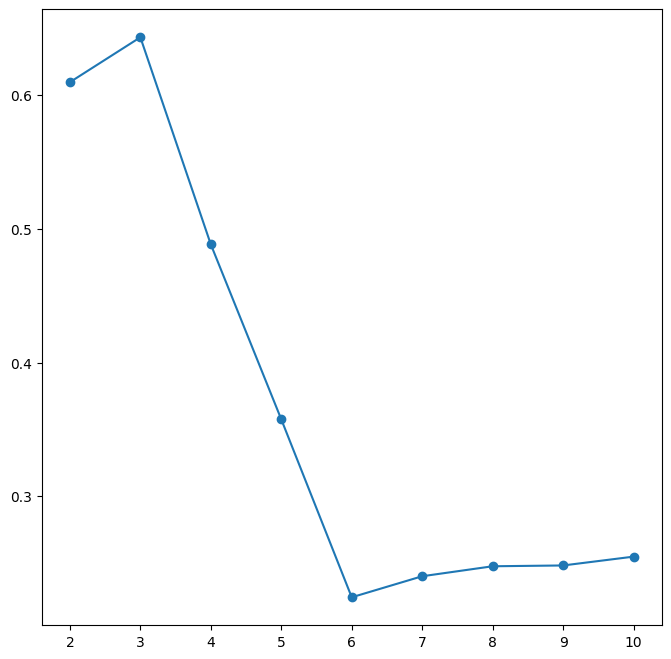

In [2]:
#シルエット係数によるクラスタ数の選択
#クラスタ内は密に集まっているほど良く、クラスタ間は遠く離れているほど良いことを表す指標
#シルエット係数は、[-1,1]。大きいほど、良いことを表す。

from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

clusterNumList = []
scoreList = []

for i in range(2,11):
    clusters = fcluster(linkage_matrix, t=i, criterion='maxclust')
    score = silhouette_score(df, clusters, metric='euclidean')
    print(i,score)
    clusterNumList.append(i)
    scoreList.append(score)

fig = plt.figure(figsize=(8,8))
plt.plot(clusterNumList,scoreList,marker="o")

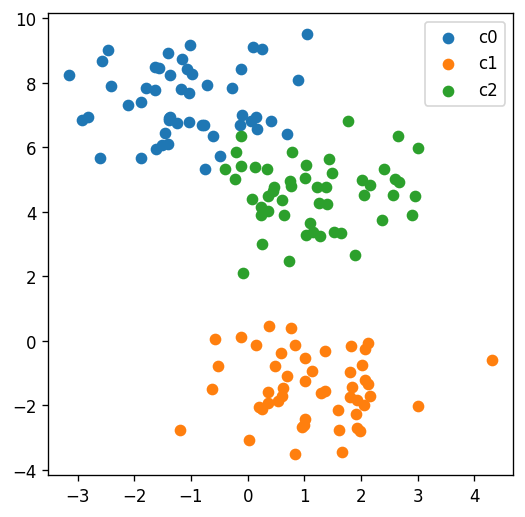

In [3]:
#非階層型クラスタリング:KMeans
from sklearn.cluster import KMeans

df = pd.read_csv("lesson2-exercise-data1.csv")

clusterNum = 3
model = KMeans(n_clusters=clusterNum, init='k-means++', n_init='auto')
res = model.fit_predict(df)

df["cluster"] = res

fig = plt.figure(figsize=(5,5),dpi=120)
for i in range(clusterNum):
    plt.scatter(df[df["cluster"]==i]["X"],df[df["cluster"]==i]["Y"],label="c"+str(i))
plt.legend()

2 0.6143230962351337
3 0.6506045744346558
4 0.5111997232348424
5 0.48974530112047204
6 0.400886837719655
7 0.2413197870681644
8 0.23384159791620127
9 0.25830326170381074
10 0.2754073259919402


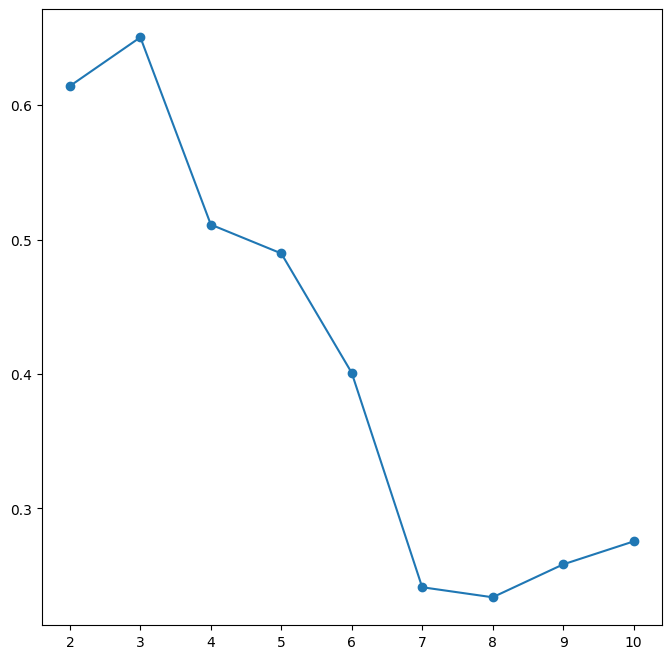

In [4]:
clusterNumList = []
scoreList = []

for i in range(2,11):
    model = KMeans(n_clusters=i, init='k-means++', n_init='auto')
    res = model.fit_predict(df)
    score = silhouette_score(df, res, metric='euclidean')
    print(i,score)
    clusterNumList.append(i)
    scoreList.append(score)

fig = plt.figure(figsize=(8,8))
plt.plot(clusterNumList,scoreList,marker="o")

,X,Y,Z,cluster
0,-0.141576,6.694634,7.287461,0
1,2.068338,-0.260441,2.068179,1
2,1.367249,-1.541038,2.530409,1
3,1.391147,4.226174,2.719843,2
4,1.249654,4.269417,1.901846,2


,X,Y,Z,cluster
0,-0.378982,0.831821,0.807547,-1.224745
1,1.160854,-0.984998,-0.695023,0.000000
2,0.672345,-1.319518,-0.561952,0.000000
3,0.688997,0.187005,-0.507416,1.224745
4,0.590407,0.198301,-0.742908,1.224745


[[-0.50303948  0.42259534  0.56526583 -0.49883766]
 [ 0.04943563  0.81420197 -0.05667013  0.57569069]]
[0.71215277 0.17723314]


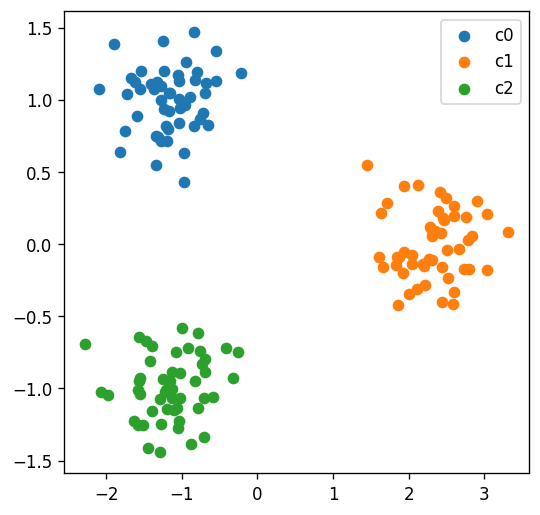

In [15]:
#主成分分析
#説明率
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

sc = StandardScaler()
df1 = pd.DataFrame(sc.fit_transform(df))
df1.columns = df.columns

display(df.head())
display(df1.head())


pca = PCA(n_components=2)
pca.fit(df1)
print(pca.components_)
print(pca.explained_variance_ratio_)

labelList = ["PC"+str(i+1) for i in range(len(pca.explained_variance_ratio_))]
# plt.bar(labelList,pca.explained_variance_ratio_)
# plt.show()

clusterNum = 3
model = KMeans(n_clusters=clusterNum, init='k-means++', n_init='auto')

feature = pca.transform(df1)
res = model.fit_predict(feature)

df2=pd.DataFrame(feature)
df2.columns = ["X","Y" ]
df2["pca_cluster"] = res

fig = plt.figure(figsize=(5,5),dpi=120)
for i in range(clusterNum):
    plt.scatter(df2[df2["pca_cluster"]==i]["X"],df2[df2["pca_cluster"]==i]["Y"],label="c"+str(i))
plt.legend()

